In [90]:
#time the cells 
%load_ext autotime

# Standard Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# Transformers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
from IPython.display import display, Markdown

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier 

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.01 ms


In [91]:
df = pd.read_csv('Databank/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


time: 99.6 ms


In [92]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

time: 6.59 ms


In [93]:
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

time: 25.1 ms


In [94]:
df.Embarked = df.Embarked.fillna(value='S')
df.Age = df.Age.fillna(df.Age.mean())
# df.Sex = LabelEncoder().fit_transform(df.Sex)

time: 92.1 ms


In [95]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
numerical_columns = ['Age', 'Fare']
categorical_columns = ["Pclass", "Sex","SibSp", "Parch", "Embarked"]

time: 87.6 ms


In [96]:
#Creating ss transformer to scale the continuous numerical data with StandardScaler()
ss = Pipeline(steps=[('ss', StandardScaler())])


#Creating ohe transformer to encode the categorical data with OneHotEncoder()
ohe = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown="ignore"))])

#Creating preprocess column transformer to combine the ss and ohe pipelines
preprocess = ColumnTransformer(
                    transformers=[
                        ('cont', ss, numerical_columns),
                        ('cat', ohe, categorical_columns)
                    ])


time: 45.6 ms


In [97]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)
    
    plt.show();

time: 84.3 ms


In [98]:
X = df.drop(['Survived'], axis=1)
y = df.Survived
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

time: 32.5 ms


In [99]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


time: 88.1 ms


In [100]:
def cross_validate(classifier, cv):
    pipeline = Pipeline(steps=[
        ('preprocess', preprocess),
        ('classifier', classifier)
    ])
    train_acc = []
    test_acc = []
    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        pipeline.fit(X_t, y_t)
        y_hat_t = pipeline.predict(X_t)
        train_acc.append(accuracy_score(y_t, y_hat_t))
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = pipeline.predict(X_val)
        test_acc.append(accuracy_score(y_val, y_hat_val))
    print(evaluation(y_val, y_hat_val))
    print('Training Accuracy: {}'.format(np.mean(train_acc)))
    print('\n')
    print('Validation Accuracy: {}'.format(np.mean(test_acc)))
    print('\n')

time: 216 ms


In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Sex          668 non-null    object 
 3   Age          668 non-null    float64
 4   SibSp        668 non-null    int64  
 5   Parch        668 non-null    int64  
 6   Fare         668 non-null    float64
 7   Embarked     668 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 47.0+ KB
time: 212 ms


/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Sex'>

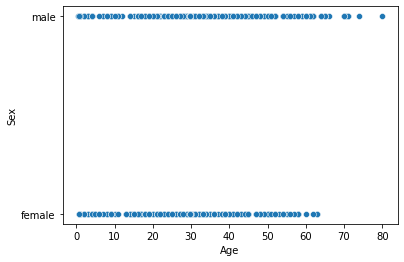

time: 434 ms


In [102]:
look = X.Age
sns.scatterplot(X.Age,X.Sex)

Recall:  0.6666666666666666
Accuracy:  0.7669172932330827
Precision:  0.6521739130434783
F1:  0.6593406593406593


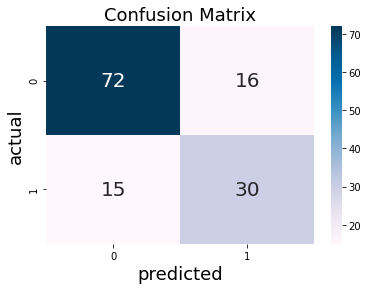

None
Training Accuracy: 0.9846567958276454


Validation Accuracy: 0.7635506677140611


time: 342 ms


In [103]:
# %debug
cross_validate(DecisionTreeClassifier(), KFold())

Recall:  0.7333333333333333
Accuracy:  0.8045112781954887
Precision:  0.7021276595744681
F1:  0.7173913043478262


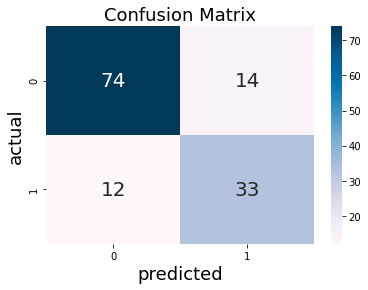

None
Training Accuracy: 0.8532990304175856


Validation Accuracy: 0.7814498933901918


time: 710 ms


In [104]:
cross_validate(KNeighborsClassifier(), KFold())

In [129]:
def grid_search(classifier, param_grid, cv):
    search = GridSearchCV(Pipeline(steps=[
        ('preprocess', preprocess),
        ('classifier', classifier)
    ]), param_grid, cv=cv)
    train_acc = []
    test_acc = []
    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        search.fit(X_t, y_t)
        y_hat_t = search.predict(X_t)
        train_acc.append(accuracy_score(y_t, y_hat_t))
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = search.predict(X_val)
        test_acc.append(accuracy_score(y_val, y_hat_val))
    print(evaluation(y_val, y_hat_val))
    print('Training Accuracy: {}'.format(np.mean(train_acc)))
    print('\n')
    print('Validation Accuracy: {}'.format(np.mean(test_acc)))
    print('\n')
    print('Grid Search Best Params:')
    print('\n')
    print(search.best_params_)

time: 1.41 ms


In [130]:
#Creating parameter grid for Random Forest
rand_forest_parms = {'classifier__n_estimators': [100, 300, 500],
                     'classifier__max_depth':[6, 25, 50, 70],
                     'classifier__min_samples_split': [2, 5, 10],
                     'classifier__min_samples_leaf': [1, 2, 10]}
#Calling the grid_search function using the parameters above
grid_search(RandomForestClassifier(), rand_forest_parms,KFold())

AttributeError: 'list' object has no attribute 'split'

In [131]:
def grid_search(classifier, param_grid, cv, print_feat=False):
    cv = cv
    search = GridSearchCV(Pipeline(steps=[
        ('preprocess', preprocess),
        ('classifier', classifier)
    ]), param_grid, cv=cv)
    train_acc = []
    test_acc = []
    for train_ind, val_ind in cv.split(X_train, y_train):
        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]
        search.fit(X_t, y_t)
        y_hat_t = search.predict(X_t)
        train_acc.append(accuracy_score(y_t, y_hat_t))
        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]
        y_hat_val = search.predict(X_val)
        test_acc.append(accuracy_score(y_val, y_hat_val))
    if print_feat:
        ohe_cols = list(search.best_estimator_.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe'].get_feature_names(
        input_features=categorical))
        num_feats = list(numerical)
        num_feats.extend(ohe_cols)
        feat_imp = eli5.explain_weights_df(search.best_estimator_.named_steps['classifier'], top=10, feature_names=num_feats)
        print(feat_imp)
    print('\n')
    print(evaluation(y_val, y_hat_val))
    print('Training Accuracy: {}'.format(np.mean(train_acc)))
    print('\n')
    print('Validation Accuracy: {}'.format(np.mean(test_acc)))
    print('\n')
    print('Grid Search Best Params:')
    print('\n')
    print(search.best_params_)

time: 5.85 ms


In [ ]:
grid_search(RandomForestClassifier(), rand_forest_parms, KFold()) print_feat=True)

In [ ]:
final_pipeline = GridSearchCV(Pipeline(steps=[
        ('preprocess', preprocess),
        ('classifier', RandomForestClassifier())
    ]), rand_forest_parms, cv=KFold())
#Fit and predict on train data
final_pipeline.fit(X_train, y_train)
train_pred = final_pipeline.best_estimator_.predict(X_train)
print('Evaluation on training data \n')
print(evaluation(y_train, train_pred))
print('\n')
#Predict on test data
test_pred = final_pipeline.best_estimator_.predict(X_test)
print('Evaluation on testing data \n')
print(evaluation(y_test, test_pred))